In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Sampling Distributions ##

Now that we have learned about the Central Limit Theorem, you might be wondering if other statistics have nearly normal sampling distributions.  

Here is a "population" of 13825 United flights from the summer of 2015.  We will use this population to look at the sampling distributions of different statistics.  First, let's look at the population parameters.

In [ ]:
united = Table.read_table('united_summer2015.csv')
united

In [ ]:
#visualize
united.hist('Delay')

In [ ]:
united.hist('Delay', bins = np.arange(-20, 300, 10), ec='w')

In [ ]:
pop_ave = np.average(united.column('Delay'))
pop_sd = np.std(united.column('Delay'))
pop_sum = np.sum(united.column('Delay'))
pop_max = np.max(united.column('Delay'))
pop_median = np.median(united.column('Delay'))
pop_variance = pop_sd**2

pop_ave, pop_sd, pop_sum, pop_max, pop_median, pop_variance

## Sampling Distribution of the Sample Mean is Nearly Normal with n = 500 ## 

In [ ]:
#suppose we draw 10,000 samples of size 500 (drawn with replacement)
#from this population, compute all 10,000 averages and 
#visualize them
n = 500
repetitions = np.arange(10000)

averages = make_array()

for i in repetitions:
    sampled_flights = united.sample(n)
    sample_average = np.average(sampled_flights.column('Delay'))
    averages = np.append(averages, sample_average)


In [ ]:
Table().with_column('Sample Average', averages).hist(bins = 25, ec='w')
plots.title('Sample Averages: Sample Size ' + str(n))
plots.xlabel('Random Sample Average')
plots.plot([pop_ave, pop_ave], [0,0.2], 0, color='red', lw=3, zorder=1);
print('Population Mean = ', str(pop_ave))

## Sampling Distribution of the Sample Sum is Nearly Normal with n = 500 ## 

In [ ]:
n = 500
repetitions = np.arange(10000)

sums = make_array()

for i in repetitions:
    sampled_flights = united.sample(n)
    sample_sum = np.sum(sampled_flights.column('Delay'))
    sums = np.append(sums, sample_sum)

In [ ]:
Table().with_column('Sample Sums', sums).hist(bins = 25, ec='w')
plots.title('Sample Sums: Sample Size ' + str(n))
plots.xlabel('Random Sample Sum')
print('Population Sum = ', str(pop_sum))

## Sampling Distribution of the Sample Variance is Nearly a Chi-Squared with n = 500  ## 

The sample variance also has a sampling distribution, but it is not Normal, it is a Chi-Squared Distribution. https://online.stat.psu.edu/stat414/lesson/26/26.3 . The shape of a Chi-Squared distribution is determined by it's parameter called "degrees of freedom."  As the degrees of freedom increase, the Chi - Squared Distribution will become more symmetric, but with smaller degrees of freedom, it is right-skewed.
Below is an image of several Chi-Squared curves with increasing degrees of freedom.

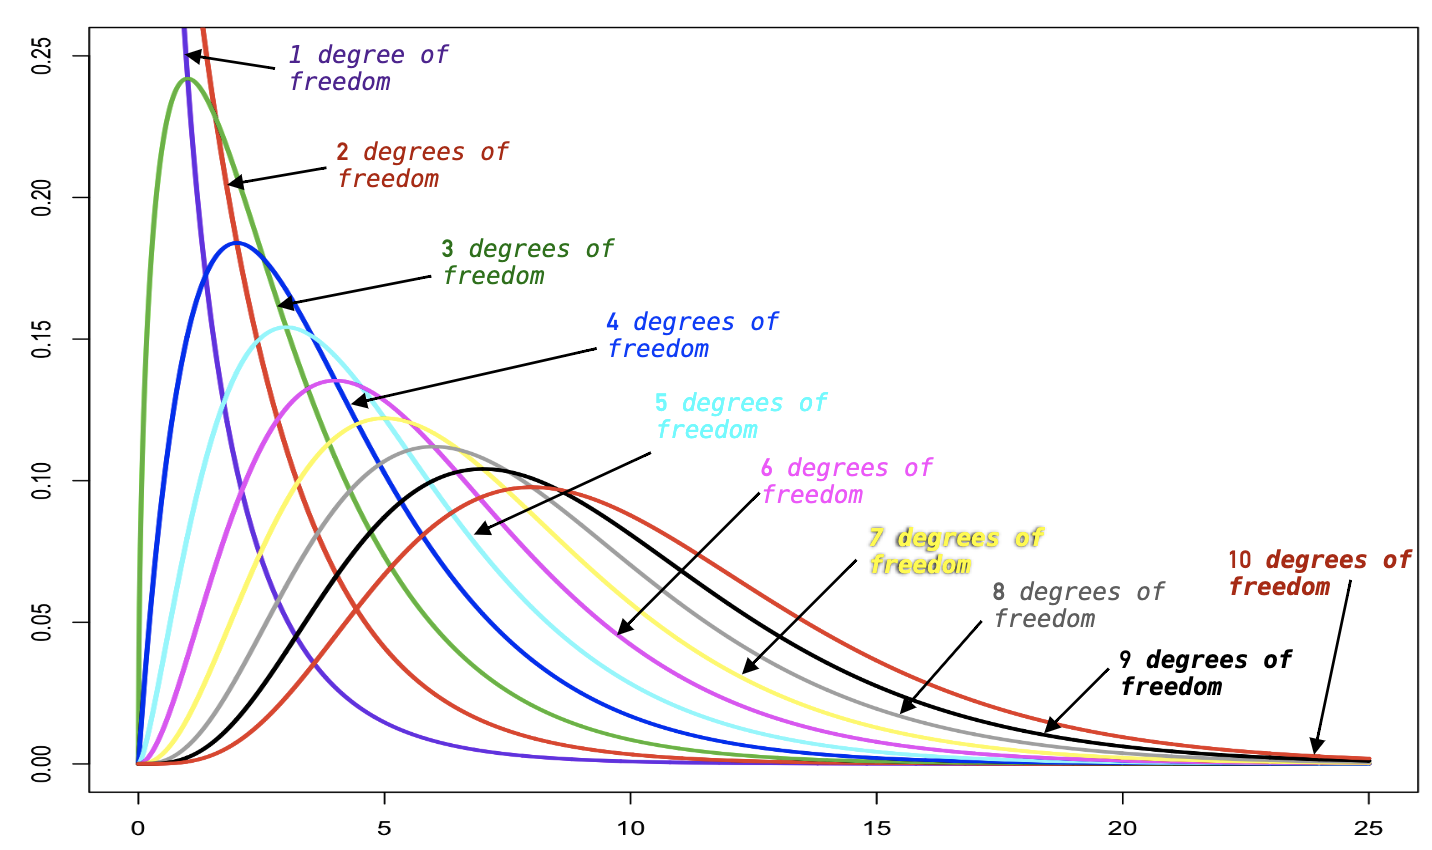

In [ ]:
n = 500
repetitions = np.arange(10000)

var = make_array()

for i in repetitions:
    sampled_flights = united.sample(n)
    sample_var = np.std(sampled_flights.column('Delay'))**2
    var = np.append(var, sample_var)

In [ ]:
Table().with_column('Sample Variance', var).hist(bins = 25, ec='w')
plots.title('Sample Variances: Sample Size ' + str(n))
plots.xlabel('Random Sample Variance')
plots.plot([pop_variance, pop_variance], [0,0.001], 0, color='red', lw=3, zorder=1);
print('Population Variance = ', str(pop_variance))

## Sampling Distribution of the Sample SD with n = 500  ## 

The sample standard deviation is the square root of the variance.  Below, we see the the distribution is not symmetric about the true population sd.

In [ ]:
n = 500
repetitions = np.arange(10000)

sds = make_array()

for i in repetitions:
    sampled_flights = united.sample(n)
    sample_sd = np.std(sampled_flights.column('Delay'))
    sds = np.append(sds, sample_sd)

In [ ]:
Table().with_column('Sample Standard Deviation', sds).hist(bins = 25, ec='w')
plots.title('Sample SDs: Sample Size ' + str(n))
plots.xlabel('Random Sample SD')
plots.plot([pop_sd, pop_sd], [0,0.07], 0, color='red', lw=3, zorder=1);
print('Population Standard Deviation = ', str(pop_sd))

## Sampling Distribution of the Sample Median with n = 500 ## 

In [ ]:
n = 500
repetitions = np.arange(10000)

medians = make_array()

for i in repetitions:
    sampled_flights = united.sample(n)
    sample_median = np.median(sampled_flights.column('Delay'))
    medians = np.append(medians, sample_median)

In [ ]:
Table().with_column('Sample Median', medians).hist(bins = 25, ec='w')
plots.title('Sample Medians: Sample Size ' + str(n))
plots.xlabel('Random Sample Median')
plots.plot([pop_median, pop_median], [0,2], 0, color='red', lw=3, zorder=1);
print('Population Median = ', str(pop_median))

## Sampling Distribution of the Sample Max with n = 500 ## 

In [ ]:
n = 500
repetitions = np.arange(10000)

maxs = make_array()

for i in repetitions:
    sampled_flights = united.sample(n)
    sample_max = np.max(sampled_flights.column('Delay'))
    maxs = np.append(maxs, sample_max)

In [ ]:
Table().with_column('Sample Max', maxs).hist(bins = 25, ec='w')
plots.title('Sample Max: Sample Size ' + str(n))
plots.xlabel('Random Sample Max')
#plots.plot([pop_max, pop_max], [0,2], 0, color='red', lw=3, zorder=1);
print('Population Max = ', str(pop_max))